## Reto 4: Validación Cruzada

### 1. Objetivos:
    - Aplicar la técnica de validación cruzada para evaluar un modelo de Regresión Lineal Múltiple

---
    
### 2. Desarrollo:

Para este Reto vamos a utilizar el mismo dataset que en el Reto anterior. Elige las variables con las que obtuviste un mejor resultado. Utilizando esas variables realiza los siguientes procesos:

1. Entrena un modelo de Regresión Lineal Múltiple utilizando validación cruzada de K-iteraciones.
2. Obtén el promedio de tus scores y el nivel de incertidumbre.
3. Compara tu resultado con el resultado obtenido en el Reto anterior.
4. Comparte tus hallazgos con tus compañeros.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Remoto Datasets/Remoto wine_quality_red-clean.csv', index_col=0)

df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
X= df[['density','chlorides']]
y=df['alcohol']

In [6]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [8]:
scores = cross_validate(lr, X, y, scoring='r2')

In [9]:
scores

{'fit_time': array([0.02919412, 0.00181985, 0.00164986, 0.00158906, 0.00154138]),
 'score_time': array([0.00150347, 0.00093222, 0.00095296, 0.0008862 , 0.00126219]),
 'test_score': array([-0.40679479, -0.45695286,  0.36755041,  0.27200977,  0.31619119])}

In [10]:
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: 0.018 +/- 0.369


In [11]:
X= df[['residual_sugar','total_sulfur_dioxide']]
y=df['pH']

In [12]:
lr = LinearRegression()

In [13]:
scores = cross_validate(lr, X, y, scoring='r2', cv=8)

In [14]:
scores

{'fit_time': array([0.00371099, 0.0017488 , 0.00160217, 0.00158739, 0.00162125,
        0.00156713, 0.00161695, 0.00167322]),
 'score_time': array([0.00155783, 0.00153279, 0.00091553, 0.00091267, 0.00090623,
        0.00090313, 0.00090885, 0.00121665]),
 'test_score': array([-0.02763536, -0.05493584, -0.41797412, -0.01391458, -0.10873324,
        -0.01522292,  0.00315776, -0.29052927])}

In [15]:
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: -0.116 +/- 0.145


In [16]:
X= df[['fixed_acidity','volatile_acidity']]
y=df['citric_acid']

In [17]:
lr = LinearRegression()

In [21]:
scores = cross_validate(lr, X, y, scoring='r2')

In [23]:
scores

{'fit_time': array([0.00827193, 0.01334572, 0.00322843, 0.00279927, 0.00292873]),
 'score_time': array([0.0016253 , 0.01057601, 0.00468445, 0.008003  , 0.00130057]),
 'test_score': array([0.44739935, 0.57655597, 0.55780255, 0.64528103, 0.45721463])}

In [24]:
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: 0.537 +/- 0.075


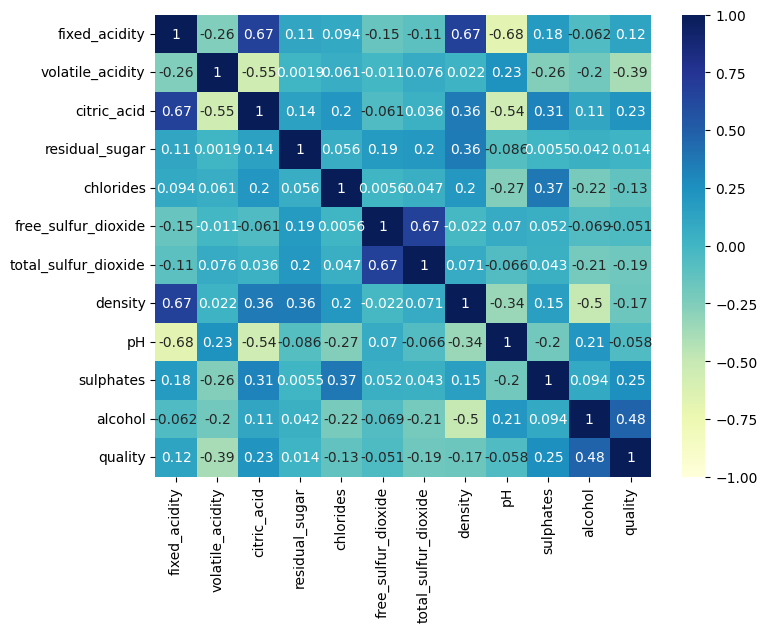

In [26]:
plt.figure(figsize=(8,6))
ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot =True, cmap="YlGnBu")

In [28]:
X= df[['citric_acid','density']]
y=df['fixed_acidity']

In [29]:
scores = cross_validate(lr, X, y, scoring='r2')

In [30]:
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: 0.459 +/- 0.168
